# CNC - Anomaly Detection

## Project Description

1251 parts were produced by 3 different computerized numerical control (CNC) machines. The two important dimensions (X1 and X2) were measured. The parts are all mixed and have not been identified by which machine produced them.

- First, I will look for any cluster patterns.
- then, I will try to identify the anomalies in each machine (the 5% of the parts whose dimensions differ from the majority of the parts produced by the same machine).This will help the engineer analyze each machine separately so they can diagnose the issues with each CNC machine.



##  Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('CNCMeasureData.csv')
dataset

,Dimension 1 (mm),Dimension 2 (mm)
0,100.82,101.33
1,100.29,101.30
2,98.10,99.99
3,100.42,101.03
4,97.24,99.84
...,...,...
1245,102.94,99.82
1246,101.78,102.37
1247,103.01,101.10
1248,104.63,101.77


In [3]:
X = dataset.iloc[:, [0, 1]].values

In [4]:
pd.DataFrame(X)

,0,1
0,100.82,101.33
1,100.29,101.30
2,98.10,99.99
3,100.42,101.03
4,97.24,99.84
...,...,...
1245,102.94,99.82
1246,101.78,102.37
1247,103.01,101.10
1248,104.63,101.77


In [5]:
type(X)

numpy.ndarray

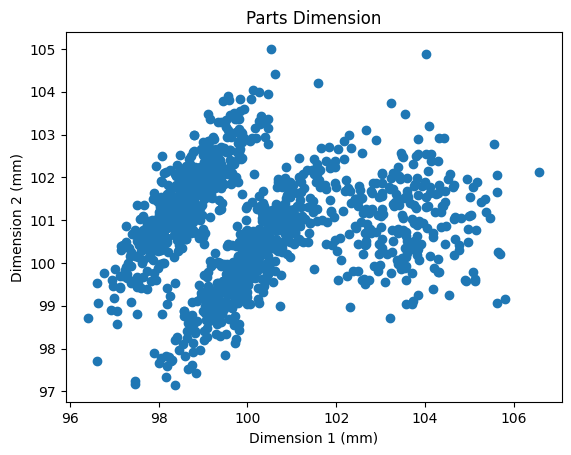

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.title('Parts Dimension')
plt.xlabel('Dimension 1 (mm)')
plt.ylabel('Dimension 2 (mm)')
plt.show()

## Anomaly Detection using Gaussian Mixtures

### Clustering Uisng Gaussian Mixture Model 

In [9]:
from sklearn.mixture import GaussianMixture
GMM = GaussianMixture(n_components=3, n_init=10, random_state=42)
GMM.fit(X)


GaussianMixture(n_components=3, n_init=10, random_state=42)

In [10]:
#The mean of each mixture component
Centers=GMM.means_
Centers

array([[ 98.59229639, 101.42710696],
       [103.40068309, 101.0595911 ],
       [100.05201004, 100.0756432 ]])

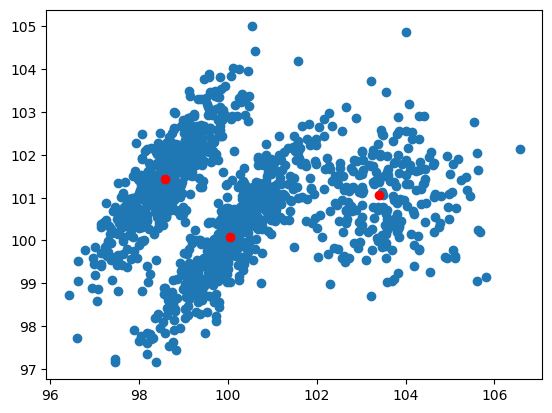

In [11]:
plt.scatter(X[:,0],X[:,1])

plt.scatter(Centers[:,0],Centers[:,1], c='red' )


- A Gaussian Mixture Model with three components is fitted to the data. This model assumes that the data is generated from a mixture of several Gaussian distributions.
- The means of each mixture component (centroids) are computed and plotted on the scatter plot, giving an indication of the centers of the clusters.

In [12]:
y_GM =GMM.predict(X)

In [13]:
pd.DataFrame(y_GM)

,0
0,2
1,2
2,0
3,2
4,0
...,...
1245,1
1246,2
1247,1
1248,1


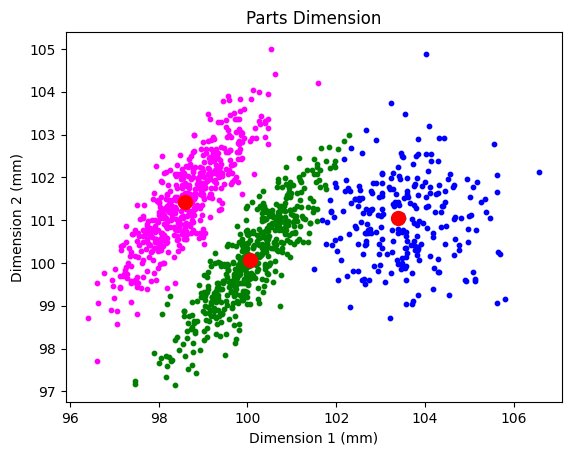

In [14]:
plt.scatter(X[y_GM == 0, 0], X[y_GM == 0, 1], s = 10, c = 'magenta', label = 'Cluster 1')
plt.scatter(X[y_GM == 1, 0], X[y_GM == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_GM == 2, 0], X[y_GM == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(Centers[:,0],Centers[:,1], s = 100, c = 'red', label = 'Centroids')

plt.title('Parts Dimension')
plt.xlabel('Dimension 1 (mm)')
plt.ylabel('Dimension 2 (mm)')
plt.show()

Clustering and Visualization:
- The data points are assigned to clusters based on the fitted GMM. Each cluster is represented by a different color on the scatter plot, along with the centroids.

### Anomaly Detection Using Gaussian Mixture Model

Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. We must define what density threshold we want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 5%; we can set the density threshold to the value that results in having 5% of the instances located in areas below that threshold density.



In [31]:
densities = GMM.score_samples(X)
density_threshold = np.percentile(densities, 5)
anomalies = X[densities < density_threshold]

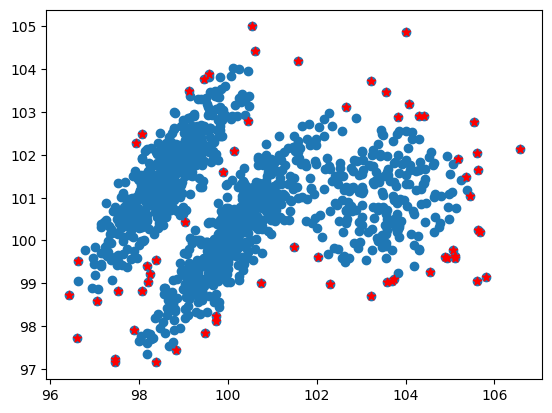

In [32]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.show()

Gaussian Mixtures are also used for anomaly detection. Data points in low-density regions (i.e., far from the centroids) are considered anomalies.
The density threshold is set to identify the lowest 5% of data points.
A scatter plot is created to highlight these anomalies, which are represented as red stars.

In [17]:
#densities for all the points
GMM.score_samples(X)

array([-2.60997776, -3.54494706, -3.32844977, ..., -3.51210509,
       -4.39646618, -3.80800524])

In [18]:
#density_threshold
np.percentile(densities, 5)

-5.229545977345657

In [19]:
X

array([[100.82, 101.33],
       [100.29, 101.3 ],
       [ 98.1 ,  99.99],
       ...,
       [103.01, 101.1 ],
       [104.63, 101.77],
       [103.59, 100.24]])

In [20]:
(densities < density_threshold)

array([False, False, False, ..., False, False, False])

In [21]:
# Total number of anamolies 
len(X[densities < density_threshold])

63

In [22]:
# anamoly points
X[densities < density_threshold]

array([[ 99.89, 101.61],
       [100.62, 104.42],
       [101.5 ,  99.85],
       [100.74,  99.  ],
       [ 97.46,  97.23],
       [ 98.38,  99.54],
       [ 98.25,  99.22],
       [ 96.42,  98.72],
       [ 99.57, 103.89],
       [100.54, 105.  ],
       [ 99.49,  97.84],
       [ 99.46, 103.78],
       [ 98.19,  99.41],
       [ 98.2 ,  99.03],
       [ 97.89,  97.9 ],
       [ 96.61,  97.72],
       [101.58, 104.2 ],
       [ 97.52,  98.81],
       [ 97.06,  98.58],
       [ 98.38,  97.15],
       [ 99.74,  98.23],
       [100.46, 102.78],
       [ 97.94, 102.27],
       [ 96.62,  99.53],
       [100.14, 102.08],
       [ 97.46,  97.17],
       [ 98.07,  98.81],
       [ 99.73,  98.13],
       [ 99.12, 103.49],
       [ 98.84,  97.43],
       [ 98.07, 102.49],
       [ 99.03, 100.44],
       [104.89,  99.61],
       [104.93,  99.58],
       [105.81,  99.15],
       [105.68, 100.21],
       [103.83, 102.89],
       [105.12,  99.63],
       [103.55, 103.48],
       [105.55, 102.77],
